### 训练模型

In [1]:
import pandas as pd

df = pd.read_excel("data_RCA.xlsx", sheet_name="Sheet1", header=0)
df.iloc[:, 2:] = df.iloc[:, 2:].applymap(lambda x: 1 if int(x) >= 1 else 0)

# 迭代F, F的初始值为1
def FC(Q, F):
    Q_tem = {}
    F_tem = {}
    for i in df.itertuples():
        f = sum(df.loc[i[0], j] * Q.get(str(j), 1) for j in df.columns[2:])
        F_tem[str(i[1])] = f

    # 迭代Q, Q的初始值为1
    for i in df.columns[2:]:
        q_denominator = sum(
            df.loc[j[0], i] / F.get(str(j[1]), 1) for j in df.itertuples()
        )
        q = 1 / q_denominator
        Q_tem[str(i)] = q

    # Normalization
    for i in Q_tem.items():
        Q_tem[str(i[0])] = round(i[1] / (sum(Q_tem.values()) / len(Q_tem)), 4)

    for i in F_tem.items():
        F_tem[str(i[0])] = round(i[1] / (sum(F_tem.values()) / len(F_tem)), 4)

    # print(Q_tem, F_tem)
    diff = abs(
        sum(Q_tem.values()) + sum(F_tem.values()) - sum(Q.values()) - sum(F.values())
    )
    return Q_tem, F_tem, diff


Q = {}
F = {}
for _ in range(50):
    Q, F, diff = FC(Q, F)
    print(f"第{_}次迭代：", diff)
    if diff == 0:
        break

# output
pd.DataFrame.from_dict(F, orient='index', columns=['F']).reset_index().rename(columns={'index': '国家'}).to_excel("F.xlsx", index=False)
pd.DataFrame.from_dict(Q, orient='index', columns=['Q']).reset_index().rename(columns={'index': '商品类别'}).to_excel("Q.xlsx", index=False)


第0次迭代： 459.82950000000005
第1次迭代： 76.37819999999999
第2次迭代： 17.663399999999967
第3次迭代： 2.8635999999999058
第4次迭代： 1.3149000000001365
第5次迭代： 0.41799999999983584
第6次迭代： 0.76660000000021
第7次迭代： 0.12159999999988713
第8次迭代： 0.29089999999990823
第9次迭代： 0.04179999999990969
第10次迭代： 0.11290000000013833
第11次迭代： 0.01600000000013324
第12次迭代： 0.04569999999978336
第13次迭代： 0.0053000000002043635
第14次迭代： 0.01909999999992351
第15次迭代： 0.0018000000000029104
第16次迭代： 0.008900000000039654
第17次迭代： 0.0014999999999645297
第18次迭代： 0.0032999999999105967
第19次迭代： 9.999999997489795e-05
第20次迭代： 0.002500000000111413
第21次迭代： 0.0004000000000132786
第22次迭代： 0.0003999999998995918
第23次迭代： 0.00029999999992469384
第24次迭代： 0.00029999999998153726
第25次迭代： 0.0


### 画图

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# pd.set_option('display.max_rows', 200)

df_F = pd.read_excel('F.xlsx', header=0)
df_export = pd.read_excel('export2020.xlsx', header=0)
df_export['log'] = np.log10(df_export['出口额（亿美元）'])

In [3]:
df = pd.merge(df_export, df_F, how='inner', on='国家')
df = df.sort_values(by=['log'], ascending=False).reset_index(drop=True)
df

,国家,出口额（亿美元）,log,F
0,USA,14302.536235,4.155413,14.8015
1,Germany,13828.511885,4.140775,3.3690
2,Japan,6412.825682,3.807049,3.2335
3,Netherlands,5515.978037,3.741623,4.5150
4,Rep. of Korea,5127.098560,3.709872,2.7201
...,...,...,...,...
106,Belize,2.118726,0.326075,1.7526
107,Burundi,1.618615,0.209143,0.1992
108,Aruba,0.659308,-0.180912,0.8000
109,Gambia,0.258600,-0.587372,0.6405


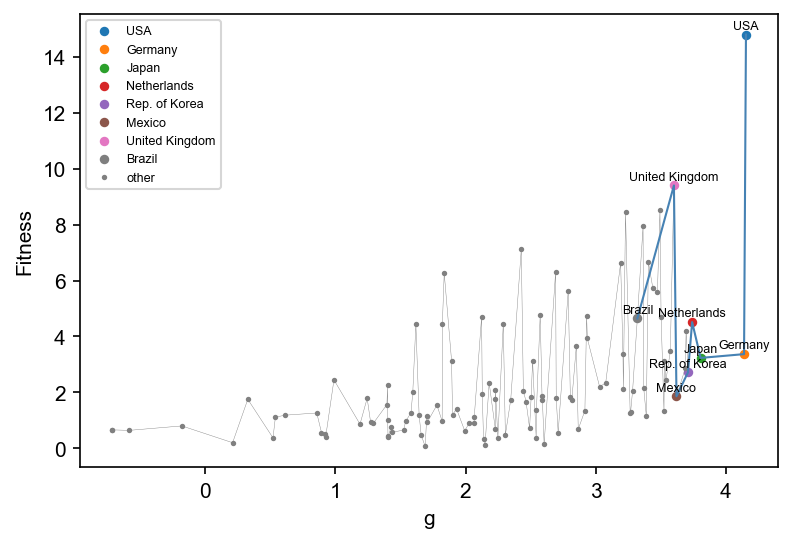

In [4]:
country = ['Brazil','Mexico','China','USA','Germany','Japan','Rep. of Korea','United Kingdom','Netherlands']
plt.figure(figsize=(6, 4),dpi=150)

for row in df.iterrows():
    if row[1]['国家'] in country:
        plt.scatter(row[1]['log'], row[1]['F'], marker='.', label=row[1]['国家'], s=50 )
    else:
        plt.scatter(row[1]['log'], row[1]['F'], color='gray', marker='.', s=10)

plt.scatter(-0.718888,0.6595, color='gray', marker='.', s=10, label='other')
plt.plot(df['log'], df['F'], linestyle='-', color='gray', linewidth=0.2)
df2 = df[df['国家'].isin(country)]
plt.plot(df2['log'], df2['F'], linestyle='-', color='steelblue', linewidth=1)
for row in df2.iterrows():
    plt.annotate(row[1]['国家'], xy=(row[1]['log'], row[1]['F']), xytext=(row[1]['log'], row[1]['F']+0.2), ha='center', fontsize=6) 

plt.xlabel('g')
plt.ylabel('Fitness')
plt.legend(loc='best', fontsize=6)
plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']
# plt.savefig("figure1.svg", format="svg")
plt.show()


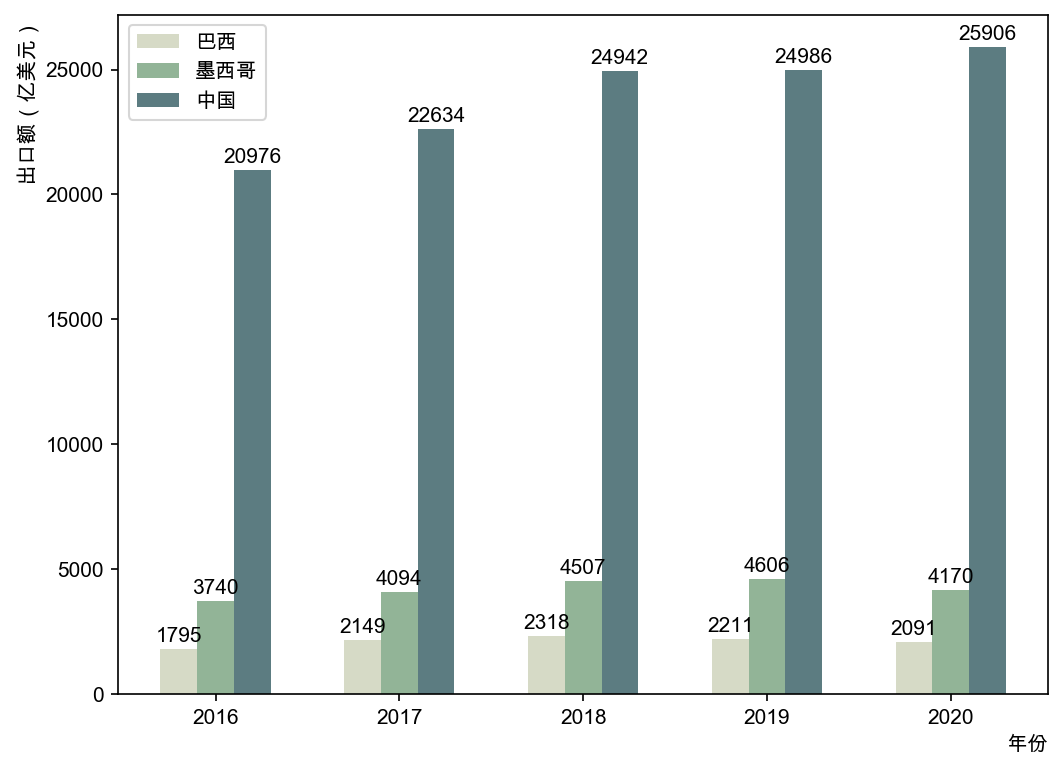

In [5]:

data = {"巴西":[1795, 2149, 2318, 2211, 2091],
"墨西哥":[3740, 4094, 4507, 4606, 4170],
"中国": [20976, 22634, 24942, 24986, 25906]}
plt.figure(figsize=(8, 6), dpi=150)
plt.bar([i-0.2 for i in list(range(2016,2021))], [1795, 2149, 2318, 2211, 2091], width=0.2, label='巴西', color="#D6DAC6")
plt.bar(list(list(range(2016, 2021))), [3740, 4094, 4507, 4606, 4170], width=0.2, label='墨西哥', color="#92B497")
plt.bar([i+0.2 for i in list(range(2016,2021))], [20976, 22634, 24942, 24986, 25906], width=0.2, label='中国', color="#5C7C81")
for c,d in zip(data.keys(),[-0.2, 0, 0.2]):
    for i,j in zip(list(range(2016,2021)), data[c]):
        plt.text(i+d,j+300, j, ha='center' )

plt.xlabel('年份', loc='right')
plt.ylabel('出口额（亿美元）', loc='top')
plt.legend()
# plt.savefig("figure2.svg", format="svg")
plt.show()
